In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import scipy.stats
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
plt.style.use('fivethirtyeight')

In [2]:
data_raw = pd.read_csv('df/Index2018.csv')

df = data_raw.copy()

df.date = pd.to_datetime(df.date,dayfirst=True)
df.set_index('date',inplace = True)
# setting frequency
df = df.asfreq('b')
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [4]:
df.spx = df.spx.fillna(method = 'ffill')# front filling(taking previous value)
df.ftse = df.ftse.fillna(method = 'bfill')# back filling(taking next value)
df.dax = df.dax.fillna(df.dax.mean())
df.nikkei = df.nikkei.fillna(method = 'ffill')

In [5]:
ftse_df = df.ftse
size = int(len(ftse_df)*0.8)
ftse_train = ftse_df.iloc[:size]
ftse_test = ftse_df.iloc[size:]

In [6]:
def llr(mod1,mod2,deg = 1):
    l1 = mod1.fit().llf
    l2 = mod2.fit().llf
    lr = 2*(l2-l1)
    p = chi2.sf(lr,deg)
    return p

In [7]:
spx_df = df.spx
returns = spx_df.pct_change().mul(100)
returns=returns.dropna()

In [8]:
returns_sqrd = returns.mul(returns)

C:\Users\vasee\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


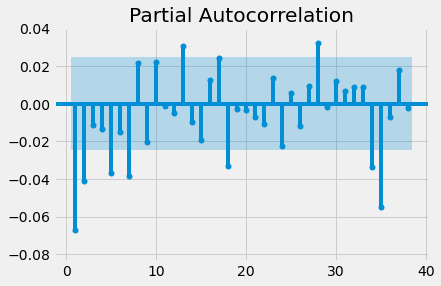

In [9]:
plot_pacf(returns,zero = False, auto_ylims = True);

C:\Users\vasee\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


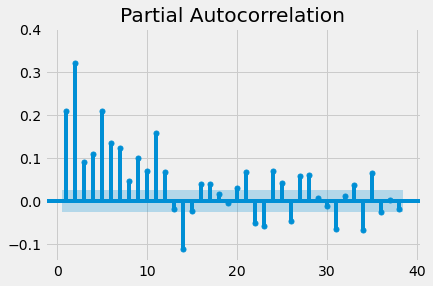

In [10]:
plot_pacf(returns_sqrd,zero = False, auto_ylims = True);

# ARCH MODEL

In [12]:
from arch import arch_model

In [13]:
model_arch = arch_model(returns)
result_arch = model_arch.fit()# update_freq = n to adgust the uotput
result_arch.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 532507680480354.25
Iteration:      2,   Func. Count:     15,   Neg. LLF: 565312515.4685841
Iteration:      3,   Func. Count:     23,   Neg. LLF: 8393.774067884722
Iteration:      4,   Func. Count:     29,   Neg. LLF: 8366.158839042164
Iteration:      5,   Func. Count:     35,   Neg. LLF: 8457.649195011487
Iteration:      6,   Func. Count:     41,   Neg. LLF: 8311.072058557558
Iteration:      7,   Func. Count:     47,   Neg. LLF: 8324.60909650332
Iteration:      8,   Func. Count:     54,   Neg. LLF: 8298.267569461985
Iteration:      9,   Func. Count:     60,   Neg. LLF: 8296.806705754638
Iteration:     10,   Func. Count:     65,   Neg. LLF: 8296.802014729505
Iteration:     11,   Func. Count:     70,   Neg. LLF: 8296.80191180868
Iteration:     12,   Func. Count:     75,   Neg. LLF: 8296.80183981367
Iteration:     13,   Func. Count:     79,   Neg. LLF: 8296.801839814016
Optimization terminated successfully    (Exit mode 0)
            

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                    spx   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8296.80
Distribution:                  Normal   AIC:                           16601.6
Method:            Maximum Likelihood   BIC:                           16628.6
                                        No. Observations:                 6276
Date:                Sat, Nov 12 2022   Df Residuals:                     6275
Time:                        14:24:36   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0628  9.830e-03      6.386  1.703e-10 [4.351e-02,8.204e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0119  3.320e-03      3.578  3.460e-04 [5.372e-03,1.839e-02]
alpha[1]       0.0846  1.185e-02      7.134  9.726e-13   [6.133e-02,  0.108]
beta[1]        0.9059  1.274e-02     71.098      0.000     [  0.881,  0.931]
============================================================================

Covariance estimator: robust
"""

In [14]:
model_arch1 = arch_model(returns,mean = 'Constant', vol ='ARCH',p=1)
result_arch1 = model_arch1.fit()# update_freq = n to adgust the uotput
result_arch1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 39001.615063240824
Iteration:      2,   Func. Count:     13,   Neg. LLF: 14514.508528760198
Iteration:      3,   Func. Count:     20,   Neg. LLF: 9580.704940716823
Iteration:      4,   Func. Count:     26,   Neg. LLF: 9353.687485305625
Iteration:      5,   Func. Count:     30,   Neg. LLF: 9353.687482026548
Iteration:      6,   Func. Count:     33,   Neg. LLF: 9353.687482026553
Optimization terminated successfully    (Exit mode 0)
            Current function value: 9353.687482026548
            Iterations: 6
            Function evaluations: 33
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                    spx   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -9353.69
Distribution:                  Normal   AIC:                           18713.4
Method:            Maximum Likelihood   BIC:                           18733.6
                                        No. Observations:                 6276
Date:                Sat, Nov 12 2022   Df Residuals:                     6275
Time:                        14:41:56   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0531  1.521e-02      3.490  4.823e-04 [2.328e-02,8.291e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.9070  4.512e-02     20.104  6.870e-90 [  0.819,  0.995]
alpha[1]       0.3119  4.933e-02      6.323  2.564e-10 [  0.215,  0.409]
========================================================================

Covariance estimator: robust
"""

In [15]:
model_arch2 = arch_model(returns,mean = 'Constant', vol ='ARCH',p=2)
result_arch2 = model_arch2.fit()# update_freq = n to adgust the uotput
result_arch2.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 174778.99851749555
Iteration:      2,   Func. Count:     15,   Neg. LLF: 10832845.872962093
Iteration:      3,   Func. Count:     21,   Neg. LLF: 9505.581944103338
Iteration:      4,   Func. Count:     28,   Neg. LLF: 9920.591340999623
Iteration:      5,   Func. Count:     34,   Neg. LLF: 9253.508668371494
Iteration:      6,   Func. Count:     41,   Neg. LLF: 8962.687618343309
Iteration:      7,   Func. Count:     47,   Neg. LLF: 8959.932704177409
Iteration:      8,   Func. Count:     52,   Neg. LLF: 8959.932703123455
Iteration:      9,   Func. Count:     56,   Neg. LLF: 8959.932703123464
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8959.932703123455
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                    spx   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -8959.93
Distribution:                  Normal   AIC:                           17927.9
Method:            Maximum Likelihood   BIC:                           17954.8
                                        No. Observations:                 6276
Date:                Sat, Nov 12 2022   Df Residuals:                     6275
Time:                        14:53:03   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0654  1.303e-02      5.019  5.188e-07 [3.986e-02,9.094e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.6192  3.389e-02     18.272  1.385e-74 [  0.553,  0.686]
alpha[1]       0.1980  3.069e-02      6.454  1.092e-10 [  0.138,  0.258]
alpha[2]       0.3285  3.913e-02      8.394  4.680e-17 [  0.252,  0.405]
========================================================================

Covariance estimator: robust
"""

In [16]:
model_arch3 = arch_model(returns,mean = 'Constant', vol ='ARCH',p=3)
result_arch3 = model_arch3.fit()# update_freq = n to adgust the uotput
result_arch3.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 204872.3404998472
Iteration:      2,   Func. Count:     17,   Neg. LLF: 2601424.609866589
Iteration:      3,   Func. Count:     24,   Neg. LLF: 9768.225538032932
Iteration:      4,   Func. Count:     32,   Neg. LLF: 9027.201772830394
Iteration:      5,   Func. Count:     39,   Neg. LLF: 9247.490359931693
Iteration:      6,   Func. Count:     47,   Neg. LLF: 8908.155366289986
Iteration:      7,   Func. Count:     54,   Neg. LLF: 9091.285476915411
Iteration:      8,   Func. Count:     62,   Neg. LLF: 8773.13279052461
Iteration:      9,   Func. Count:     68,   Neg. LLF: 8773.085794537894
Iteration:     10,   Func. Count:     74,   Neg. LLF: 8773.085048937524
Iteration:     11,   Func. Count:     80,   Neg. LLF: 8773.085031226805
Iteration:     12,   Func. Count:     85,   Neg. LLF: 8773.085031226507
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8773.085031226805
            Iterations: 12
  

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                    spx   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -8773.09
Distribution:                  Normal   AIC:                           17556.2
Method:            Maximum Likelihood   BIC:                           17589.9
                                        No. Observations:                 6276
Date:                Sat, Nov 12 2022   Df Residuals:                     6275
Time:                        14:54:18   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0661  1.171e-02      5.646  1.639e-08 [4.317e-02,8.908e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.4756  3.090e-02     15.390  1.897e-53   [  0.415,  0.536]
alpha[1]       0.1278  2.199e-02      5.811  6.210e-09 [8.470e-02,  0.171]
alpha[2]       0.3129  3.901e-02      8.021  1.048e-15   [  0.236,  0.389]
alpha[3]       0.2091  2.831e-02      7.386  1.508e-13   [  0.154,  0.265]
==========================================================================

Covariance estimator: robust
"""

# GARCH MODEL

In [18]:
model_garch = arch_model(returns,mean = 'Constant', vol ='GARCH',p=1,q=1)
result_garch = model_garch.fit(update_freq=5)# update_freq = n to adgust the uotput
result_garch.summary()

Iteration:      5,   Func. Count:     35,   Neg. LLF: 8457.649195011487
Iteration:     10,   Func. Count:     65,   Neg. LLF: 8296.802014729505
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8296.80183981367
            Iterations: 13
            Function evaluations: 79
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                    spx   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8296.80
Distribution:                  Normal   AIC:                           16601.6
Method:            Maximum Likelihood   BIC:                           16628.6
                                        No. Observations:                 6276
Date:                Sat, Nov 12 2022   Df Residuals:                     6275
Time:                        15:55:48   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0628  9.830e-03      6.386  1.703e-10 [4.351e-02,8.204e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0119  3.320e-03      3.578  3.460e-04 [5.372e-03,1.839e-02]
alpha[1]       0.0846  1.185e-02      7.134  9.726e-13   [6.133e-02,  0.108]
beta[1]        0.9059  1.274e-02     71.098      0.000     [  0.881,  0.931]
============================================================================

Covariance estimator: robust
"""

In [22]:
model_garch21 = arch_model(returns,mean = 'Constant', vol ='GARCH',p=1,q=2)
result_garch21 = model_garch21.fit(update_freq=5)# update_freq = n to adgust the uotput
result_garch21.summary()

Iteration:      5,   Func. Count:     40,   Neg. LLF: 8316.268896374957
Iteration:     10,   Func. Count:     72,   Neg. LLF: 8296.876869070642
Iteration:     15,   Func. Count:    102,   Neg. LLF: 8296.801840120377
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8296.801839868645
            Iterations: 15
            Function evaluations: 102
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                    spx   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8296.80
Distribution:                  Normal   AIC:                           16603.6
Method:            Maximum Likelihood   BIC:                           16637.3
                                        No. Observations:                 6276
Date:                Sat, Nov 12 2022   Df Residuals:                     6275
Time:                        16:01:55   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0628  9.839e-03      6.380  1.768e-10 [4.349e-02,8.206e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0119  3.162e-03      3.757  1.722e-04 [5.681e-03,1.808e-02]
alpha[1]       0.0846  1.092e-02      7.740  9.915e-15   [6.315e-02,  0.106]
beta[1]        0.9059      0.125      7.235  4.669e-13     [  0.660,  1.151]
beta[2]    3.6298e-09      0.123  2.963e-08      1.000     [ -0.240,  0.240]
============================================================================

Covariance estimator: robust
"""

In [21]:
model_garch31 = arch_model(returns,mean = 'Constant', vol ='GARCH',p=1,q=3)
result_garch31 = model_garch31.fit(update_freq=5)# update_freq = n to adgust the uotput
result_garch31.summary()

Iteration:      5,   Func. Count:     47,   Neg. LLF: 8375.036349834616
Iteration:     10,   Func. Count:     87,   Neg. LLF: 8299.046870747627
Iteration:     15,   Func. Count:    124,   Neg. LLF: 8296.802444126874
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8296.801839810269
            Iterations: 18
            Function evaluations: 144
            Gradient evaluations: 18


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                    spx   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8296.80
Distribution:                  Normal   AIC:                           16605.6
Method:            Maximum Likelihood   BIC:                           16646.1
                                        No. Observations:                 6276
Date:                Sat, Nov 12 2022   Df Residuals:                     6275
Time:                        16:01:40   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0628  9.865e-03      6.363  1.977e-10 [4.344e-02,8.211e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0119  3.177e-03      3.739  1.847e-04 [5.652e-03,1.811e-02]
alpha[1]       0.0846  1.332e-02      6.350  2.159e-10   [5.846e-02,  0.111]
beta[1]        0.9059      0.128      7.075  1.490e-12     [  0.655,  1.157]
beta[2]        0.0000      0.283      0.000      1.000     [ -0.555,  0.555]
beta[3]    2.2233e-12      0.205  1.084e-11      1.000     [ -0.402,  0.402]
============================================================================

Covariance estimator: robust
"""